# Orthographic similarity classification

In [1]:
# Install dependencies
from polyglot.downloader import downloader
from polyglot.text import Text 
from math import floor, ceil
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

## Data preprocessing

In [2]:
import unicodedata

# Function to remove diacritics
def remove_diacritics(text):
    normalized_text = unicodedata.normalize('NFKD', text)
    return ''.join([c for c in normalized_text if not unicodedata.combining(c)])


In [3]:
# !polyglot download transliteration2.ru
# !polyglot download transliteration2.bg
# !polyglot download transliteration2.mk

In [4]:
import pandas as pd

# Preprocess the dataset 
def preprocess_data():
    dataset = pd.read_csv('/home/klychliiev/Desktop/Automatic_false_friends_detection_for_Ukrainian_and_Polish_languages/datasets/dataset.csv')
    dataset = dataset.drop('Unnamed: 0', axis=1)
    dataset['orthographic_sim'] = dataset['false_friends'].replace({0: 1, 1: 1, 2: 0})

    word_pairs = []
    y_true = []

    for _, row in dataset.iterrows():
        pl_word = row[1]
        uk_word = row[2]

        if uk_word != '':  # Check if uk_word is not an empty string
            blob = uk_word
            text = Text(blob, hint_language_code='uk')
            if "’" in text:
                text = text.replace("’", "й")
            uk_transliterated = str(text.transliterate('en')[0])

            blob2 = pl_word
            text2 = Text(blob2, hint_language_code='pl')
            pl_transliterated = str(text2.transliterate('en')[0])

            word_pairs.append((uk_transliterated, pl_transliterated))
            y_true.append(row['orthographic_sim'])  # Append the corresponding value to y_true

    return y_true, word_pairs

y_true, word_pairs = preprocess_data()


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


In [7]:
# Apply the function to the second item in each tuple
normalized = [(first, remove_diacritics(second)) for first, second in word_pairs]

print(normalized)

[('snidanok', 'sniadanie'), ('vegetariański', 'wegetarianin'), ('napius', 'napoj'), ('kawa', 'kawa'), ('sik', 'sok'), ('voda', 'woda'), ('pivo', 'pivo'), ('vino', 'wino'), ('sil', 'sol'), ('myaso', 'mieso'), ('riba', 'ryba'), ('desert', 'deser'), ('chas', 'chas'), ('godina', 'godzina'), ('ranok', 'rano'), ('den', 'dzien'), ('vchora', 'vchoraj'), ('tijden', 'tydzien'), ('mixiac', 'miesiac'), ('rik', 'rok'), ('ponedilok', 'poniedzialek'), ('vivtorok', 'wtorek'), ('sereda', 'sroda'), ('chetver', 'czwartek'), ('pyatnica', 'piatek'), ('subota', 'sobota'), ('nedila', 'niedziela'), ('sichen', 'stychen'), ('luty', 'luty'), ('quiten', 'kwiecien'), ('cherven', 'cherwiec'), ('lipen', 'lipiec'), ('serpna', 'sierpien'), ('veresen', 'wrzesien'), ('listopad', 'listopad'), ('gruden', 'grudzien'), ('vesna', 'wiosna'), ('lito', 'lato'), ('osin', 'jesien'), ('tak', 'tak'), ('dakuu', 'dziekuje'), ('pereproshuu', 'przeprasham'), ('dobranich', 'dobranoc'), ('a', 'ja'), ('mi', 'my'), ('ti', 'ty'), ('vi', 'wy

In [9]:
import re


# Function to replace suffixes 'ok', 'yk', 'ik' with 'ek'
def replace_suffix(text):
    return re.sub(r"(ok|yk|ik)$", "ek", text)


# Function to replace prefix 'vid' with 'od'
def replace_prefix(text):
    return re.sub(r"^vid", "od", text)


# Function to replace 'sh' at the beginning of a word with 'sz'
def replace_sh_with_sz(text):
    return re.sub(r"^sh", "sz", text)


# Function to replace 'uwa' with 'owa'
def replace_uwa_with_owa(text):
    return re.sub(r"uva", "ova", text)


def replace_ch_with_cz(text):
    return re.sub(r"ch", "cz", text)
    
def ere(text):
    return re.sub(r"ere", "rze", text)

def je(text):
    return re.sub(r"^je", "o", text)

def sie(text):
    return re.sub(r"sie", "si", text)

def nie(text):
    return re.sub(r"nie", "ne", text)

def dz(text):
    return re.sub(r"dz", "d", text)

def rz(text):
    return re.sub(r"rz", "r", text)

def replace_ti_with_c(text):
    return re.sub(r'ti$', 'c', text)

modified_list = [
    (
        replace_suffix(ere(replace_ch_with_cz(
            replace_prefix(replace_sh_with_sz(replace_uwa_with_owa(t[0]))))).replace(
                "v", "w"
            )
        ),
        replace_sh_with_sz(replace_ch_with_cz(t[1])).replace("v", "w"),
    )
    for t in normalized]

In [11]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Make predictions 
similarities = []
sims = []

for word_pair in modified_list:

    similarity_value = similar(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    sims.append(similarity_value)
    if similarity_value >=0.4:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       438
           1       0.94      0.96      0.95       438

    accuracy                           0.95       876
   macro avg       0.95      0.95      0.95       876
weighted avg       0.95      0.95      0.95       876



In [16]:
dataset = pd.read_csv('/home/klychliiev/Desktop/Automatic_false_friends_detection_for_Ukrainian_and_Polish_languages/datasets/dataset.csv')

In [17]:
dataset.head()

,Unnamed: 0,id,pl,uk,false_friends
0,0,1,śniadanie,сніданок,0
1,1,2,wegetarianin,вегетаріанський,0
2,2,3,napój,напій,0
3,3,4,kawa,кава,0
4,4,5,sok,сік,0


## Similarity metrics

### Jaro similarity

In [190]:
def jaro_distance(s1: str, s2: str) -> float:
    """
    Функція для обрахування подібності слів за метрикою "подібність Джаро".
    Приймає на вхід два обʼєкти типу string, які є українським та польським словом, 
    для яких буде обрховується показник подібності.

    Args:
        s1 (str): українська слово;
        s2 (str): польське слово.

    Returns:
        float: обрахований коефіціент подібності для поданих слів.
    """
     
    if (s1 == s2):
        return 1.0
 
    len1 = len(s1)
    len2 = len(s2)
 
    max_dist = floor(max(len1, len2) / 2) - 1
 
    # кількість збігів; початково - 0
    match = 0
 
    hash_s1 = [0] * len(s1)
    hash_s2 = [0] * len(s2)
 
    for i in range(len1):
 
        for j in range(max(0, i - max_dist),
                       min(len2, i + max_dist + 1)):
             
            if (s1[i] == s2[j] and hash_s2[j] == 0):
                hash_s1[i] = 1
                hash_s2[j] = 1
                match += 1
                break
 
    # перевірка на відсутність збігів
    if (match == 0):
        return 0.0
 
    t = 0
    point = 0

    for i in range(len1):
        if (hash_s1[i]):

            while (hash_s2[point] == 0):
                point += 1
 
            if (s1[i] != s2[point]):
                t += 1
            point += 1
    t = t//2
 
    # остаточне обрахування показники подібності Джаро
    return (match/ len1 + match / len2 +
            (match - t) / match)/ 3.0

In [191]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = jaro_distance(word_pair[0], word_pair[1])

    if similarity_value >= 0.6:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       438
           1       0.94      0.94      0.94       438

    accuracy                           0.94       876
   macro avg       0.94      0.94      0.94       876
weighted avg       0.94      0.94      0.94       876



In [12]:
print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       438
           1       0.94      0.89      0.92       438

    accuracy                           0.92       876
   macro avg       0.92      0.92      0.92       876
weighted avg       0.92      0.92      0.92       876



In [13]:
confusion_matrix = connormalizedfusion_matrix(y_true, similarities)

[Text(0, 0.5, 'non-homographs'), Text(0, 1.5, 'homographs')]

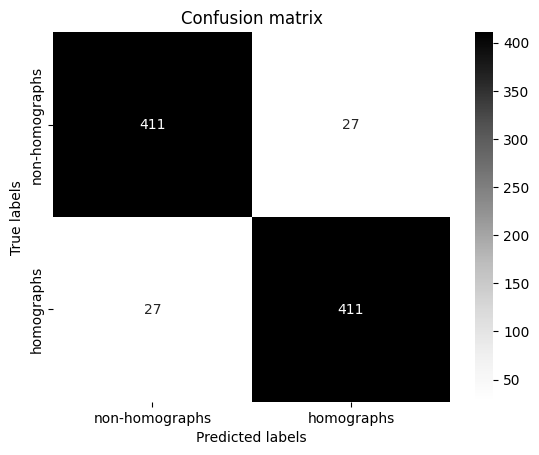

In [192]:
confusion_matrix = confusion_matrix(y_true, similarities)
ax = plt.subplot()
sns.heatmap(confusion_matrix,annot=True,fmt='.0f',cmap='Greys')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix') 
ax.xaxis.set_ticklabels(['non-homographs', 'homographs'])
ax.yaxis.set_ticklabels(['non-homographs', 'homographs'])

### Edit distance

In [160]:
def levenshtein_distance(word1, word2):
    # Create a table to store results of subproblems
    dp = [[0 for x in range(len(word2) + 1)] for x in range(len(word1) + 1)]

    # Fill dp[][] in bottom up manner
    for i in range(len(word1) + 1):
        for j in range(len(word2) + 1):

            # If first string is empty, the only option is to
            # insert all characters of second string
            if i == 0:
                dp[i][j] = j    # Min. operations = j

            # If second string is empty, the only option is to
            # remove all characters of first string
            elif j == 0:
                dp[i][j] = i    # Min. operations = i

            # If last characters are the same, ignore the last char
            # and recur for remaining string
            elif word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]

            # If last character is different, consider all
            # possibilities and find the minimum
            else:
                dp[i][j] = 1 + min(dp[i][j-1],        # Insert
                                   dp[i-1][j],        # Remove
                                   dp[i-1][j-1])      # Replace

    return dp[-1][-1]

# Example usage
word1 = "lol"
word2 = "lol"
distance = levenshtein_distance(word1, word2)
print(f"The Levenshtein distance between '{word1}' and '{word2}' is {distance}")


The Levenshtein distance between 'lol' and 'lol' is 0


In [161]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = levenshtein_distance(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value <= 3:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       438
           1       0.96      0.81      0.88       438

    accuracy                           0.89       876
   macro avg       0.90      0.89      0.89       876
weighted avg       0.90      0.89      0.89       876



### Tversky index 

In [162]:
def tversky_index(s1, s2, alpha=0.5, beta=0.5):
    """
    Функція для обрахування індексу Тверськи для вхідного українського та польського слів.

    Args:
        s1 (str): українське слово;
        s2 (str): польське слово.

    Returns:
        float: обрахований коефіціент подібності для поданих слів.
    """

    # створення сетів для двох слів
    set1, set2 = set(s1), set(s2)

    # обрахування перетинів і відмінностей
    intersection = len(set1 & set2)
    only_in_set1 = len(set1 - set2)
    only_in_set2 = len(set2 - set1)

    # обрахування індексу
    denominator = intersection + alpha * only_in_set1 + beta * only_in_set2
    if denominator == 0:
        return 0  # обробка ділення на 0
    tversky_index = intersection / denominator
    return tversky_index

# Example usage
s1 = "apple"
s2 = "rename"
index = tversky_index(s1, s2)
print(f"The Tversky index between '{s1}' and '{s2}' is {index:.2f}")


The Tversky index between 'apple' and 'rename' is 0.44


In [163]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = tversky_index(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >= 0.5:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       438
           1       0.89      0.94      0.91       438

    accuracy                           0.91       876
   macro avg       0.91      0.91      0.91       876
weighted avg       0.91      0.91      0.91       876



### Hellinger

In [164]:
from collections import Counter

def block_distance(s1: str, s2: str) -> float:
    """
    Функція для обрахування відстанні Геллінгера для вхідного українського та польського слів.

    Args:
        s1 (str): українське слово;
        s2 (str): польське слово.

    Returns:
        float: обрахований коефіціент подібності для поданих слів.
    """

    # обрахунок частот символів у словах
    freq1 = Counter(s1)
    freq2 = Counter(s2)

    # створення сетів унікальних символів у словах
    all_chars = set(freq1.keys()).union(set(freq2.keys()))

    distance = 0
    for char in all_chars:
        distance += abs(freq1.get(char, 0) - freq2.get(char, 0))

    return distance

# Example usage
s1 = "example"
s2 = "example"
distance = block_distance(s1, s2)
print(f"The block distance between '{s1}' and '{s2}' is {distance}")


The block distance between 'example' and 'example' is 0


In [176]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = block_distance(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value <= 5:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       438
           1       0.93      0.85      0.89       438

    accuracy                           0.89       876
   macro avg       0.90      0.89      0.89       876
weighted avg       0.90      0.89      0.89       876



In [177]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Make predictions 
similarities = []

for word_pair in normalized:

    similarity_value = similar(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >=0.4:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       438
           1       0.93      0.95      0.94       438

    accuracy                           0.94       876
   macro avg       0.94      0.94      0.94       876
weighted avg       0.94      0.94      0.94       876



In [11]:
normalized

[('snidanok', 'sniadanie'),
 ('vegetariański', 'wegetarianin'),
 ('napius', 'napoj'),
 ('kawa', 'kawa'),
 ('sik', 'sok'),
 ('voda', 'woda'),
 ('pivo', 'pivo'),
 ('vino', 'wino'),
 ('sil', 'sol'),
 ('myaso', 'mieso'),
 ('riba', 'ryba'),
 ('desert', 'deser'),
 ('chas', 'chas'),
 ('godina', 'godzina'),
 ('ranok', 'rano'),
 ('den', 'dzien'),
 ('vchora', 'vchoraj'),
 ('tijden', 'tydzien'),
 ('mixiac', 'miesiac'),
 ('rik', 'rok'),
 ('ponedilok', 'poniedzialek'),
 ('vivtorok', 'wtorek'),
 ('sereda', 'sroda'),
 ('chetver', 'czwartek'),
 ('pyatnica', 'piatek'),
 ('subota', 'sobota'),
 ('nedila', 'niedziela'),
 ('sichen', 'stychen'),
 ('luty', 'luty'),
 ('quiten', 'kwiecien'),
 ('cherven', 'cherwiec'),
 ('lipen', 'lipiec'),
 ('serpna', 'sierpien'),
 ('veresen', 'wrzesien'),
 ('listopad', 'listopad'),
 ('gruden', 'grudzien'),
 ('vesna', 'wiosna'),
 ('lito', 'lato'),
 ('osin', 'jesien'),
 ('tak', 'tak'),
 ('dakuu', 'dziekuje'),
 ('pereproshuu', 'przeprasham'),
 ('dobranich', 'dobranoc'),
 ('a', 'j

[Text(0, 0.5, 'non-homographs'), Text(0, 1.5, 'homographs')]

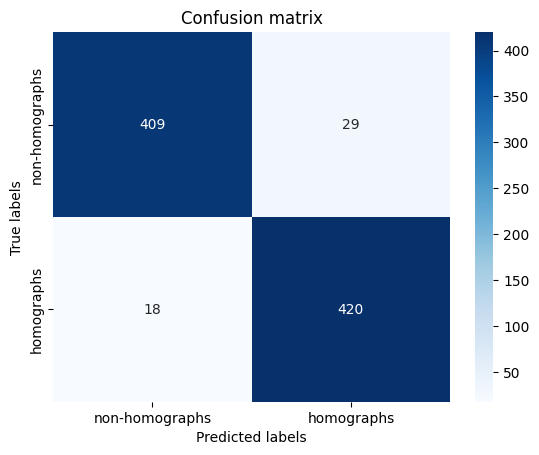

In [181]:
confusion_matrix = confusion_matrix(y_true, similarities)
ax = plt.subplot()
sns.heatmap(confusion_matrix,annot=True,fmt='.0f',cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix') 
ax.xaxis.set_ticklabels(['non-homographs', 'homographs'])
ax.yaxis.set_ticklabels(['non-homographs', 'homographs'])

In [264]:
!pip install jellyfish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:01:010m


In [282]:
import jellyfish 

# Make predictions 
similarities = []

for word_pair in word_pairs:

    similarity_value = jellyfish.nysiis(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >= 0.5:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

TypeError: nysiis() takes 1 positional arguments but 2 were given

### Simple Matching Coefficient

In [166]:
def simple_matching_coefficient(s1: str, s2: str) -> float:
    """
    Функція для обрахування Simple Matching Coefficient для вхідного українського та польського слів.

    Args:
        s1 (str): українське слово;
        s2 (str): польське слово.

    Returns:
        float: обрахований коефіціент подібності для поданих слів.
    """

    set1, set2 = set(s1), set(s2)

    union = set1.union(set2)
    intersection = set1.intersection(set2)

    m00 = len(union - intersection)  # символи яких нема в жодному зі слів
    m11 = len(intersection)          # є в обох словах
    m01 = len(set1 - set2)           # лише у слові 1
    m10 = len(set2 - set1)           # лише у слові 2

    smc = (m11 + m00) / (m11 + m00 + m01 + m10)
    return smc

# Example usage
s1 = "binary"
s2 = "binary"
coefficient = simple_matching_coefficient(s1, s2)
print(f"The Simple Matching Coefficient between '{s1}' and '{s2}' is {coefficient:.2f}")


The Simple Matching Coefficient between 'binary' and 'binary' is 1.00


In [167]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = simple_matching_coefficient(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >= 0.6:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       438
           1       0.89      0.94      0.91       438

    accuracy                           0.91       876
   macro avg       0.91      0.91      0.91       876
weighted avg       0.91      0.91      0.91       876



### Hamming distance

In [161]:
def hamming_distance(word1, word2):
    # Check if the strings are of the same length
    if len(word1) == len(word2):
        
        # Count the number of differences between equal positions
        return sum(c1 != c2 for c1, c2 in zip(word1, word2))

# Example usage
word1 = "snidanok"
word2 = "snidanok"
distance = hamming_distance(word1, word2)
distance

0

In [156]:
print(word_pairs[0][0], word_pairs[0][1])

snidanok śniadanie


In [152]:
# Make predictions 
similarities = []

for word_pair in word_pairs:

    similarity_value = hamming_distance(word_pair[0], word_pair[1])

    print(similarity_value)

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value <= 3:
        similarities.append(1)
    else:
        similarities.append(0)

len(similarities)

# print(classification_report(y_true, similarities))

None


TypeError: '<=' not supported between instances of 'NoneType' and 'int'

### bl

In [168]:
def bigram_similarity(word1, word2):
    """
    Функція для обрахування подібності вхідного українського та польського слів за біграмами.

    Args:
        s1 (str): українське слово;
        s2 (str): польське слово.

    Returns:
        float: обрахований коефіціент подібності для поданих слів.
    """
    def generate_bigrams(word):
        return {word[i:i+2] for i in range(len(word) - 1)}

    bigrams1 = generate_bigrams(word1)
    bigrams2 = generate_bigrams(word2)

    intersection = bigrams1.intersection(bigrams2)

    union = bigrams1.union(bigrams2)

    if len(union) == 0:
        return 0  
    return len(intersection) / len(union)

# Example usage
word1 = "kawa"
word2 = "kavka"
similarity = bigram_similarity(word1, word2)
print(f"The bigram similarity between '{word1}' and '{word2}' is {similarity}")


The bigram similarity between 'kawa' and 'kavka' is 0.2


In [169]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = bigram_similarity(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >= 0.05:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       438
           1       0.91      0.89      0.90       438

    accuracy                           0.90       876
   macro avg       0.90      0.90      0.90       876
weighted avg       0.90      0.90      0.90       876



### Cosine

In [170]:
from collections import Counter
import math

def cosine_similarity(word1: str, word2: str) -> float:
    """
    Функція для обрахування косинусної подібності вхідного українського та польського слів.

    Args:
        word1 (str): українське слово;
        word2 (str): польське слово.

    Returns:
        float: обрахований коефіціент подібності для поданих слів.
    """
    vec1 = Counter(word1)
    vec2 = Counter(word2)

    all_items = set(vec1.keys()).union(set(vec2.keys()))
    
    dot_product = sum(vec1[ch] * vec2[ch] for ch in all_items)
    
    norm1 = math.sqrt(sum(v**2 for v in vec1.values()))
    norm2 = math.sqrt(sum(v**2 for v in vec2.values()))
    
    if norm1 == 0 or norm2 == 0:
        return 0
    
    cosine = dot_product / (norm1 * norm2)
    return cosine

# Example usage
word1 = "rosy"
word2 = "silent"
similarity = cosine_similarity(word1, word2)
print(f"The cosine similarity between '{word1}' and '{word2}' is {similarity:.2f}")


The cosine similarity between 'rosy' and 'silent' is 0.20


In [171]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = cosine_similarity(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >= 0.5:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       438
           1       0.89      0.92      0.90       438

    accuracy                           0.90       876
   macro avg       0.90      0.90      0.90       876
weighted avg       0.90      0.90      0.90       876



### Dice's coefficient

In [172]:
def dices_coefficient(word1: str, word2: str) -> float:
    """
    Функція для обрахування коефіцієнта Дайса для вхідного українського та польського слів.

    Args:
        word1 (str): українське слово;
        word2 (str): польське слово.

    Returns:
        float: обрахований коефіціент подібності для поданих слів.
    """
    def generate_character_set(word):
        return set(word)

    set1 = generate_character_set(word1)
    set2 = generate_character_set(word2)

    intersection = len(set1.intersection(set2))
    total_chars = len(set1) + len(set2)

    if total_chars == 0:
        return 0 
    return (2 * intersection) / total_chars

# Example usage
word1 = "night"
word2 = "night"
similarity = dices_coefficient(word1, word2)
print(f"Dice's coefficient between '{word1}' and '{word2}' is {similarity:.2f}")


Dice's coefficient between 'night' and 'night' is 1.00


In [173]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = dices_coefficient(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >= 0.5:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       438
           1       0.89      0.94      0.91       438

    accuracy                           0.91       876
   macro avg       0.91      0.91      0.91       876
weighted avg       0.91      0.91      0.91       876



### Overlap coefficients

In [174]:
def overlap_coefficient(word1: str, word2: str) -> float:
    """
    Функція для обрахування подібності слів за коефіціентом перетину.
    Приймає на вхід два обʼєкти типу string, які є українським та польським словом, 
    для яких буде обраховано показник подібності за метрикою "коефіціент перетину".

    Args:
        word1 (str): українська слово;
        word2 (str): польське слово.

    Returns:
        float: обрахований коефіціент подібності для поданих слів.
    """

    set1 = set(word1)
    set2 = set(word2)

    intersection_size = len(set1.intersection(set2))

    min_size = min(len(set1), len(set2))

    if min_size == 0:
        return 0 

    return intersection_size / min_size

# Example usage
word1 = "hello"
word2 = "hello"
overlap = overlap_coefficient(word1, word2)
print(f"The overlap coefficient between '{word1}' and '{word2}' is {overlap:.2f}")


The overlap coefficient between 'hello' and 'hello' is 1.00


In [175]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = overlap_coefficient(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >= 0.55:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       438
           1       0.87      0.92      0.89       438

    accuracy                           0.89       876
   macro avg       0.89      0.89      0.89       876
weighted avg       0.89      0.89      0.89       876



### Simon WHite Similarity

In [88]:
def get_bigrams(string):
    """
    Take a string and return a list of bigrams.
    """
    if string is None:
        return ""

    s = string.lower()
    return [s[i : i + 2] for i in list(range(len(s) - 1))]

def simon_similarity(str1, str2):
    """
    Perform bigram comparison between two strings
    and return a percentage match in decimal form.
    """
    pairs1 = get_bigrams(str1)
    pairs2 = get_bigrams(str2)
    union = len(pairs1) + len(pairs2)

    if union == 0 or union is None:
        return 0

    hit_count = 0
    for x in pairs1:
        for y in pairs2:
            if x == y:
                hit_count += 1
                break
    return (2.0 * hit_count) / union

In [89]:
# Make predictions 
similarities = []

for word_pair in modified_list:

    similarity_value = simon_similarity(word_pair[0], word_pair[1])

    # print(similarity_value, word_pair[0], word_pair[1])

    if similarity_value >= 0.1:
        similarities.append(1)
    else:
        similarities.append(0)

print(classification_report(y_true, similarities))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       438
           1       0.91      0.89      0.90       438

    accuracy                           0.90       876
   macro avg       0.90      0.90      0.90       876
weighted avg       0.90      0.90      0.90       876



## Save predictions

In [19]:
dataset = pd.read_csv('/home/klychliiev/Desktop/Automatic_false_friends_detection_for_Ukrainian_and_Polish_languages/datasets/dataset.csv')

In [20]:
dataset

,Unnamed: 0,id,pl,uk,false_friends
0,0,1,śniadanie,сніданок,0
1,1,2,wegetarianin,вегетаріанський,0
2,2,3,napój,напій,0
3,3,4,kawa,кава,0
4,4,5,sok,сік,0
...,...,...,...,...,...
871,871,872,pień,обрахувати,2
872,872,873,podróżować,порушити,2
873,873,874,czyhać,порвати,2
874,874,875,dwadzieścia,сапати,2


In [22]:
dataset['predictions'] = similarities

In [24]:
dataset['similarity_values'] = sims

In [25]:
dataset

,Unnamed: 0,id,pl,uk,false_friends,predictions,similarity_values
0,0,1,śniadanie,сніданок,0,1,0.823529
1,1,2,wegetarianin,вегетаріанський,0,1,0.800000
2,2,3,napój,напій,0,1,0.545455
3,3,4,kawa,кава,0,1,1.000000
4,4,5,sok,сік,0,1,0.666667
...,...,...,...,...,...,...,...
871,871,872,pień,обрахувати,2,0,0.142857
872,872,873,podróżować,порушити,2,1,0.400000
873,873,874,czyhać,порвати,2,0,0.153846
874,874,875,dwadzieścia,сапати,2,0,0.235294


In [29]:
dataset = dataset.drop('Unnamed: 0', axis=1)

In [30]:
dataset

,id,pl,uk,false_friends,predictions,similarity_values
0,1,śniadanie,сніданок,0,1,0.823529
1,2,wegetarianin,вегетаріанський,0,1,0.800000
2,3,napój,напій,0,1,0.545455
3,4,kawa,кава,0,1,1.000000
4,5,sok,сік,0,1,0.666667
...,...,...,...,...,...,...
871,872,pień,обрахувати,2,0,0.142857
872,873,podróżować,порушити,2,1,0.400000
873,874,czyhać,порвати,2,0,0.153846
874,875,dwadzieścia,сапати,2,0,0.235294


In [31]:
dataset.to_csv('/home/klychliiev/Desktop/Automatic_false_friends_detection_for_Ukrainian_and_Polish_languages/datasets/data_sim_values.csv')